In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# Load the uploaded CSV file
file_path = 'data_before_smote.csv'
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop('Is Fraudulent', axis=1)
y = data['Is Fraudulent']

# Split the data into training, testing, and validation sets (60% train, 20% test, 20% validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



In [15]:
# Print the sizes of each dataset
print("Dataset Sizes:")
print(f"Original Training Set Size: {X_train.shape[0]}")
print(f"Training Set Size After SMOTE: {X_train_smote.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")
print(f"Validation Set Size: {X_val.shape[0]}")

# Print description of each dataset
print("\nDescription of Each Dataset:")
print("\nTraining Set (After SMOTE):")
print(pd.DataFrame(X_train_smote).describe())

print("\nTesting Set:")
print(pd.DataFrame(X_test).describe())

print("\nValidation Set:")
print(pd.DataFrame(X_val).describe())


Dataset Sizes:
Original Training Set Size: 883830
Training Set Size After SMOTE: 1692478
Testing Set Size: 294610
Validation Set Size: 294610

Description of Each Dataset:

Training Set (After SMOTE):
       Transaction Amount      Quantity  Customer Age  Customer Location  \
count        1.692478e+06  1.692478e+06  1.692478e+06       1.692478e+06   
mean         1.527330e-01 -1.678169e-03 -3.332128e-03       1.216481e+02   
std          1.031004e+00  9.221887e-01  9.169720e-01       1.821669e+02   
min         -1.064181e+00 -1.413806e+00 -4.550282e+00       1.000000e+00   
25%         -6.332763e-01 -7.069559e-01 -6.203370e-01       1.500000e+01   
50%         -1.394823e-01 -1.055681e-04 -7.891712e-03       4.500000e+01   
75%          6.603915e-01  7.067448e-01  6.066959e-01       1.480000e+02   
max          4.217522e+00  1.413595e+00  4.547516e+00       1.276000e+03   

       Account Age Days  Transaction Hour  Shipping City  Billing City  \
count      1.692478e+06      1.692478e+0

In [16]:
from collections import Counter

# Calculate the distribution before SMOTE
distribution_before_smote = Counter(y_train)

# Calculate the distribution after SMOTE
distribution_after_smote = Counter(y_train_smote)

# Print the distributions
print("Distribution before SMOTE:")
print(f"Not Fraudulent: {distribution_before_smote[0]}")
print(f"Fraudulent: {distribution_before_smote[1]}")

print("\nDistribution after SMOTE:")
print(f"Not Fraudulent: {distribution_after_smote[0]}")
print(f"Fraudulent: {distribution_after_smote[1]}")


Distribution before SMOTE:
Not Fraudulent: 846239
Fraudulent: 37591

Distribution after SMOTE:
Not Fraudulent: 846239
Fraudulent: 846239


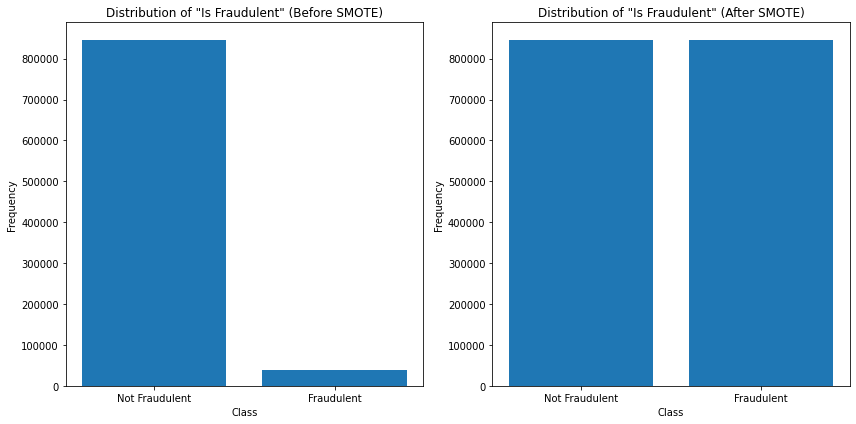

In [17]:
import matplotlib.pyplot as plt
from collections import Counter

# Calculate the distribution of classes before and after SMOTE
dist_before_smote = Counter(y_train)
dist_after_smote = Counter(y_train_smote)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Distribution before SMOTE
ax[0].bar(['Not Fraudulent', 'Fraudulent'], dist_before_smote.values())
ax[0].set_title('Distribution of "Is Fraudulent" (Before SMOTE)')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Frequency')

# Distribution after SMOTE
ax[1].bar(['Not Fraudulent', 'Fraudulent'], dist_after_smote.values())
ax[1].set_title('Distribution of "Is Fraudulent" (After SMOTE)')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [18]:
X_train_smote

,Transaction Amount,Quantity,Customer Age,Customer Location,Account Age Days,Transaction Hour,Shipping City,Billing City,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet,Transaction Year,Transaction Month,Transaction Day,Transaction Weekday
0,1.082689,-0.706956,0.548484,424,-1.182838,20,37,37,1,0,0,0,0,1,0,0,0,0,1,0,2024,2,7,2
1,1.650006,1.413595,-1.650984,149,1.677128,16,136,136,1,0,0,0,0,0,0,0,1,1,0,0,2024,1,15,0
2,1.447919,0.706745,0.948387,18,-1.276607,17,133,141,0,0,1,0,0,0,1,0,0,0,0,1,2024,3,22,4
3,-0.769095,-0.706956,0.548484,12,-0.057605,16,75,73,0,0,1,0,0,0,0,1,0,0,0,1,2024,2,10,5
4,2.167796,-0.000106,2.548000,7,0.392488,10,34,35,0,0,0,1,0,0,0,1,0,0,1,0,2024,2,25,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692473,0.549130,0.706745,0.450327,175,1.169815,4,83,86,0,0,0,0,0,0,0,0,0,0,0,0,2024,2,6,2
1692474,0.520795,-0.368316,-0.634496,144,-0.767759,8,4,4,0,0,1,0,0,0,0,0,0,0,0,0,2024,1,6,3
1692475,-1.002536,1.413595,-1.770464,353,-1.559728,11,319,319,1,0,0,0,0,0,0,0,1,0,0,0,2024,2,14,4
1692476,-0.078639,-1.410821,0.548484,2,0.140221,7,17,15,0,1,0,0,0,0,0,0,0,1,0,0,2024,2,8,3


In [19]:
y_train_smote

0          0
1          0
2          0
3          0
4          0
          ..
1692473    1
1692474    1
1692475    1
1692476    1
1692477    1
Name: Is Fraudulent, Length: 1692478, dtype: int64

In [20]:
# Combine X and y for training, testing, and validation sets

# Combine training data (X_train_smote and y_train_smote)
train_set = pd.concat([X_train_smote, y_train_smote], axis=1)

# Combine testing data (X_test and y_test)
test_set = pd.concat([X_test, y_test], axis=1)

# Combine validation data (X_val and y_val)
validation_set = pd.concat([X_val, y_val], axis=1)


# Display the first few rows of each combined dataset
print("Training Set (After SMOTE):")
print(train_set.head(), "\n")

print("Test Set:")
print(test_set.head(), "\n")

print("Validation Set:")
print(validation_set.head(), "\n")

# Print sizes of combined datasets
print("Combined Dataset Sizes:")
print(f"Training Set Size (After SMOTE): {train_set.shape[0]} rows, {train_set.shape[1]} columns")
print(f"Test Set Size: {test_set.shape[0]} rows, {test_set.shape[1]} columns")
print(f"Validation Set Size: {validation_set.shape[0]} rows, {validation_set.shape[1]} columns")


Training Set (After SMOTE):
   Transaction Amount  Quantity  Customer Age  Customer Location  \
0            1.082689 -0.706956      0.548484                424   
1            1.650006  1.413595     -1.650984                149   
2            1.447919  0.706745      0.948387                 18   
3           -0.769095 -0.706956      0.548484                 12   
4            2.167796 -0.000106      2.548000                  7   

   Account Age Days  Transaction Hour  Shipping City  Billing City  \
0         -1.182838                20             37            37   
1          1.677128                16            136           136   
2         -1.276607                17            133           141   
3         -0.057605                16             75            73   
4          0.392488                10             34            35   

   Payment Method_PayPal  Payment Method_bank transfer  \
0                      1                             0   
1                      1  

In [22]:
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Display the full train_set DataFrame
train_set


,Transaction Amount,Quantity,Customer Age,Customer Location,Account Age Days,Transaction Hour,Shipping City,Billing City,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet,Transaction Year,Transaction Month,Transaction Day,Transaction Weekday,Is Fraudulent
0,1.082689,-0.706956,0.548484,424,-1.182838,20,37,37,1,0,0,0,0,1,0,0,0,0,1,0,2024,2,7,2,0
1,1.650006,1.413595,-1.650984,149,1.677128,16,136,136,1,0,0,0,0,0,0,0,1,1,0,0,2024,1,15,0,0
2,1.447919,0.706745,0.948387,18,-1.276607,17,133,141,0,0,1,0,0,0,1,0,0,0,0,1,2024,3,22,4,0
3,-0.769095,-0.706956,0.548484,12,-0.057605,16,75,73,0,0,1,0,0,0,0,1,0,0,0,1,2024,2,10,5,0
4,2.167796,-0.000106,2.548000,7,0.392488,10,34,35,0,0,0,1,0,0,0,1,0,0,1,0,2024,2,25,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692473,0.549130,0.706745,0.450327,175,1.169815,4,83,86,0,0,0,0,0,0,0,0,0,0,0,0,2024,2,6,2,1
1692474,0.520795,-0.368316,-0.634496,144,-0.767759,8,4,4,0,0,1,0,0,0,0,0,0,0,0,0,2024,1,6,3,1
1692475,-1.002536,1.413595,-1.770464,353,-1.559728,11,319,319,1,0,0,0,0,0,0,0,1,0,0,0,2024,2,14,4,1
1692476,-0.078639,-1.410821,0.548484,2,0.140221,7,17,15,0,1,0,0,0,0,0,0,0,1,0,0,2024,2,8,3,1


## use train_set, test_set, validation_set 开始写model